In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#欠損をランダムに作成するため乱数オブジェクト作成
rng = np.random.RandomState(0)
#california_housing 読み込む
dataset = fetch_california_housing()
#説明変数を取得
X_full = dataset.data
#被説明変数を取得
y_full = dataset.target
#全てのレコードでは大きいので10サンプルごとに抽出
X_full = X_full[::10]
y_full = y_full[::10]
#欠損作成のためにレコード数とカラム数を取得
n_full_samples, n_full_features = X_full.shape
missing_full_samples = np.arange(n_full_samples)
#意図的にレコードの半分を欠損させる
missing_full_samples = np.random.choice(missing_full_samples,len(missing_full_samples)//2,replace=False)
X_missing = X_full[missing_full_samples].copy()
y = y_full
n_samples, n_features = X_missing.shape
#欠損となる列をランダムに決める
missing_features = rng.choice(n_features, n_samples, replace=True)
#欠損代入
missing_samples = np.arange(n_samples)
X_missing[missing_samples, missing_features] = np.nan
#欠損させない配列
X_not_missing = X_full[np.setdiff1d(np.arange(n_full_samples), missing_full_samples)].copy()
#欠損させる配列とさせない配列を結合
X = np.concatenate([X_not_missing,X_missing])
#データフレーム化
df_california = pd.DataFrame(np.concatenate([X,y.reshape(-1,1)],axis=1))
df_california.columns=dataset.feature_names+['Target']

########################
#サンプルデータ  準備
#Adult Data Set
########################
df_adult = pd.read_csv('adult.data',header=None)
#変数名付与
df_adult.columns = ["Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]

In [6]:
y_full

array([4.526, 2.815, 1.475, ..., 0.455, 1.   , 1.12 ])

In [17]:
X_full

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   3.2031    ,   52.        ,    5.47761194, ...,    2.26368159,
          37.85      , -122.26      ],
       [   1.3578    ,   40.        ,    4.52409639, ...,    2.46385542,
          37.85      , -122.27      ],
       ...,
       [   1.3631    ,   28.        ,    4.85193622, ...,    2.72209567,
          39.1       , -121.56      ],
       [   4.5625    ,   40.        ,    4.125     , ...,    3.14583333,
          39.05      , -121.48      ],
       [   3.5673    ,   11.        ,    5.93258427, ...,    2.8247191 ,
          39.29      , -121.32      ]])

In [2]:
#テーブルのサイズ表示
print (df_california.shape)
#カラムごとの欠損ではないレコード数 とデータ型
print (df_california.info())

(2064, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      1930 non-null   float64
 1   HouseAge    1934 non-null   float64
 2   AveRooms    1931 non-null   float64
 3   AveBedrms   1911 non-null   float64
 4   Population  1936 non-null   float64
 5   AveOccup    1937 non-null   float64
 6   Latitude    1944 non-null   float64
 7   Longitude   1957 non-null   float64
 8   Target      2064 non-null   float64
dtypes: float64(9)
memory usage: 145.2 KB
None


In [3]:
#カラムごと欠損数
print (df_california.isnull().sum())

MedInc        134
HouseAge      130
AveRooms      133
AveBedrms     153
Population    128
AveOccup      127
Latitude      120
Longitude     107
Target          0
dtype: int64


In [18]:
#統計量算出
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,1930.000000,1934.000000,1931.000000,1911.000000,1936.000000,1937.000000,1944.000000,1957.000000,2064.000000
mean,3.843388,28.459669,5.431755,1.097808,1435.455579,2.948614,35.627767,-119.573878,2.070233
std,1.912005,12.594770,2.109967,0.398255,1463.358745,1.393606,2.142152,2.013472,1.153987
min,0.499900,1.000000,1.130435,0.659574,8.000000,1.244556,32.560000,-124.170000,0.329000
25%,2.506525,18.000000,4.446898,1.008487,788.750000,2.440443,33.930000,-121.810000,1.207000
50%,3.516150,28.000000,5.264151,1.048889,1138.500000,2.799007,34.260000,-118.500000,1.804500
75%,4.750000,37.000000,6.105583,1.101294,1714.000000,3.303571,37.720000,-118.010000,2.631250
max,15.000100,52.000000,47.515152,11.181818,35682.000000,51.400000,41.920000,-114.550000,5.000010


In [31]:
#数値型変数を観察する
num_cols = [col for col in df_california if df_california[col].dtype in ['int64', 'float64']]
df_california[num_cols].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,1930.000000,1934.000000,1931.000000,1911.000000,1936.000000,1937.000000,1944.000000,1957.000000,2064.000000
mean,3.843388,28.459669,5.431755,1.097808,1435.455579,2.948614,35.627767,-119.573878,2.070233
std,1.912005,12.594770,2.109967,0.398255,1463.358745,1.393606,2.142152,2.013472,1.153987
min,0.499900,1.000000,1.130435,0.659574,8.000000,1.244556,32.560000,-124.170000,0.329000
25%,2.506525,18.000000,4.446898,1.008487,788.750000,2.440443,33.930000,-121.810000,1.207000
50%,3.516150,28.000000,5.264151,1.048889,1138.500000,2.799007,34.260000,-118.500000,1.804500
75%,4.750000,37.000000,6.105583,1.101294,1714.000000,3.303571,37.720000,-118.010000,2.631250
max,15.000100,52.000000,47.515152,11.181818,35682.000000,51.400000,41.920000,-114.550000,5.000010


In [37]:
#カテゴリ変数を観察する
cat_cols = [col for col in df_california if df_california[col].dtype in ['O']]
df_california[cat_cols].describe()

[]

In [39]:
#カテゴリ変数の固有値を直接出力
for col in cat_cols:
    uni1 = np.unique(df_california[col].astype(str))
    print('-'*50)
    print('# col{}, n_uniq{}, uniq{}'.format(col, len(uniq), uniq))
    

In [30]:
#細かくみる
for col in df_california.columns:
    print('{}/\n'.format(df_california[col].head()))

0    3.2031
1    1.3578
2    1.9274
3    2.0978
4    1.5000
Name: MedInc, dtype: float64/

0    52.0
1    40.0
2    49.0
3    52.0
4    17.0
Name: HouseAge, dtype: float64/

0    5.477612
1    4.524096
2    5.068783
3    4.215190
4    3.197232
Name: AveRooms, dtype: float64/

0    1.079602
1    1.108434
2    1.182540
3    1.060759
4    1.000000
Name: AveBedrms, dtype: float64/

0    910.0
1    409.0
2    863.0
3    946.0
4    609.0
Name: Population, dtype: float64/

0    2.263682
1    2.463855
2    2.283069
3    2.394937
4    2.107266
Name: AveOccup, dtype: float64/

0    37.85
1    37.85
2    37.84
3    37.83
4    37.81
Name: Latitude, dtype: float64/

0   -122.26
1   -122.27
2   -122.28
3   -122.26
4   -122.28
Name: Longitude, dtype: float64/

0    4.526
1    2.815
2    1.475
3    1.223
4    1.554
Name: Target, dtype: float64/



In [21]:
np.arange(df_california.shape[1])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [26]:
df_california.shape[1]

9

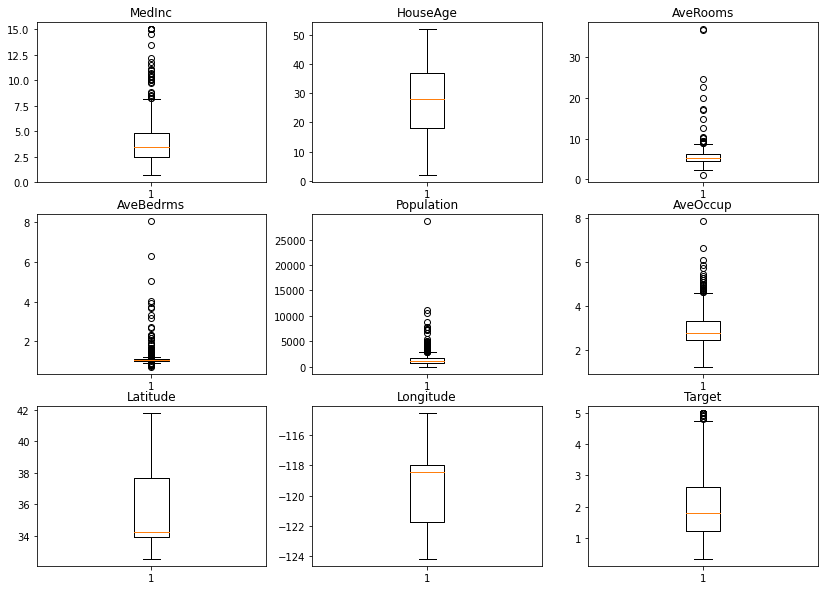

In [19]:
#変数の箱ひげ図を描く
plt.figure(figsize=(14,10))
for i in np.arange((df_california.shape[1])):
    plt.subplot(3,3,i+1)
    plt.boxplot(df_california.dropna().iloc[:,i])
    plt.title(df_california.columns[i])

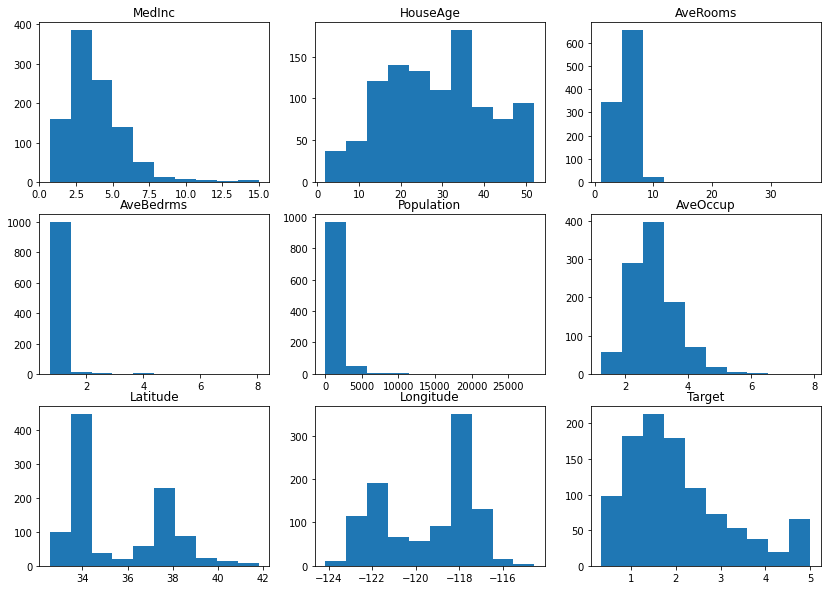

In [27]:
#変数のヒストグラムを描く
plt.figure(figsize=(14,10))
for i in np.arange((df_california.shape[1])):
    plt.subplot(3,3,i+1)
    plt.hist(df_california.dropna().iloc[:,i])
    plt.title(df_california.columns[i])

array([[<AxesSubplot:xlabel='MedInc', ylabel='MedInc'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Population', ylabel='MedInc'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Latitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Longitude', ylabel='MedInc'>,
        <AxesSubplot:xlabel='Target', ylabel='MedInc'>],
       [<AxesSubplot:xlabel='MedInc', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='HouseAge', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveRooms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveBedrms', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Population', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='AveOccup', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Latitude', ylabel='HouseAge'>,
        <AxesSubplot:xlabel='Longitude', ylabel='HouseAg

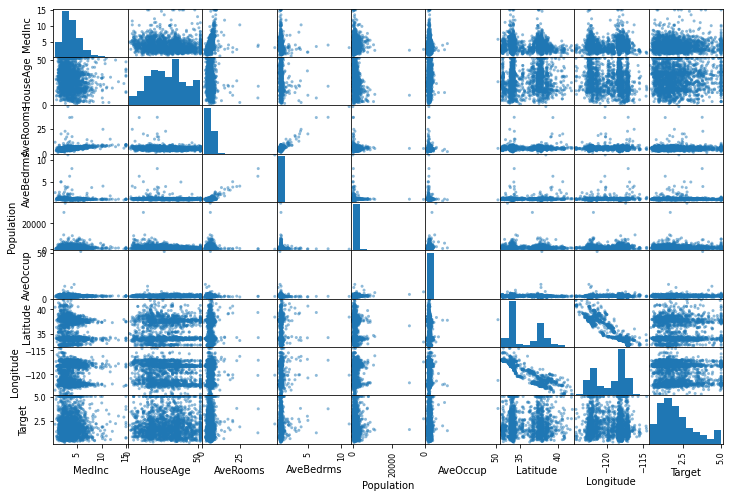

In [61]:
#散布図
from pandas.plotting import scatter_matrix
attributes = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','Target']
scatter_matrix(df_california[attributes], figsize=(12,8))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

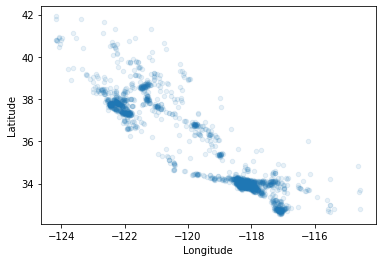

In [64]:
#大きくみせる
df_california.plot(kind='scatter', x='Longitude', y='Latitude',alpha=0.1)

In [28]:
#カテゴリカル変数の要約を確認
df_adult.describe(include='O')

,WorkClass,Education,MaritalStatus,Occupation,Relationship,Race,Gender,NativeCountry,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [40]:
#数字・カテゴリカル変数の要約を
df_adult.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
WorkClass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationNum,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
MaritalStatus,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


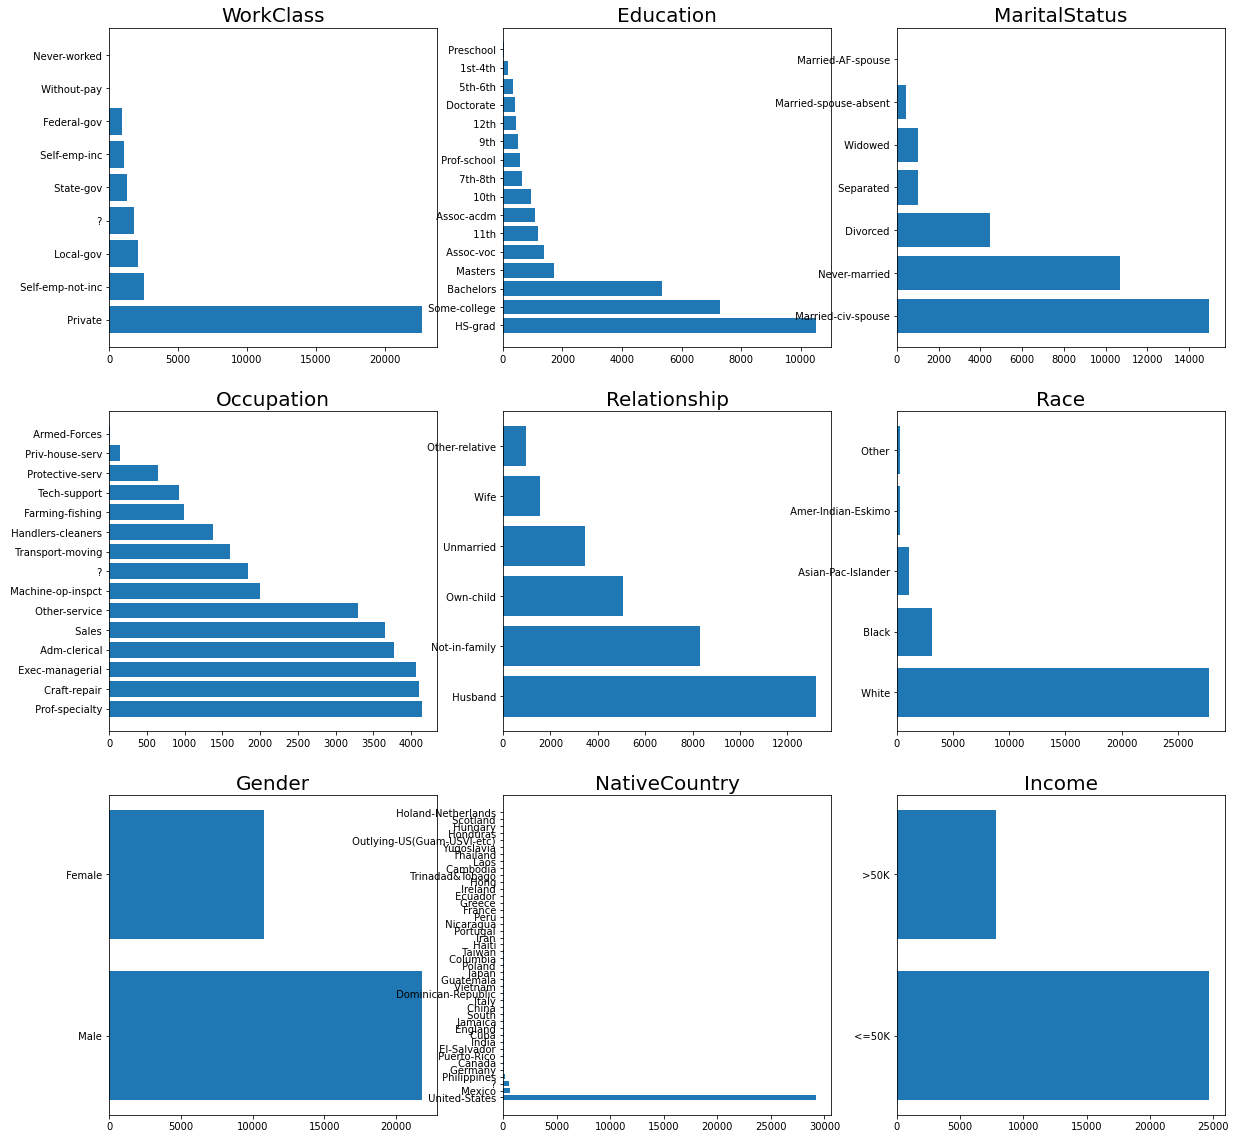

In [41]:
#プロットエリア定義
plt.figure(figsize=(20,20))
#カテゴリカル変数でヒストグラムを書く
for i,j in enumerate(df_adult.describe(include='O').columns):
    plt.subplot(3,3,i+1)
    plt.barh(width=df_adult.loc[:,j].value_counts(),
         y=df_adult.loc[:,j].value_counts().index)
    plt.title(j,fontdict={'fontsize': 20})

In [42]:
df_california.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.120741,0.388716,-0.060964,-0.006230,-0.022177,-0.073958,-0.027303,0.018916
HouseAge,-0.120741,1.000000,-0.186456,-0.109495,-0.272662,-0.008428,0.021107,-0.123854,-0.000167
AveRooms,0.388716,-0.186456,1.000000,0.813630,-0.054382,-0.041684,0.114261,-0.027639,0.016089
AveBedrms,-0.060964,-0.109495,0.813630,1.000000,-0.065414,-0.057931,0.072961,0.029456,0.018782
Population,-0.006230,-0.272662,-0.054382,-0.065414,1.000000,0.223607,-0.078481,0.064351,0.001166
AveOccup,-0.022177,-0.008428,-0.041684,-0.057931,0.223607,1.000000,-0.059406,0.049305,0.041219
Latitude,-0.073958,0.021107,0.114261,0.072961,-0.078481,-0.059406,1.000000,-0.924504,0.067861
Longitude,-0.027303,-0.123854,-0.027639,0.029456,0.064351,0.049305,-0.924504,1.000000,-0.072674
Target,0.018916,-0.000167,0.016089,0.018782,0.001166,0.041219,0.067861,-0.072674,1.000000


<AxesSubplot:>

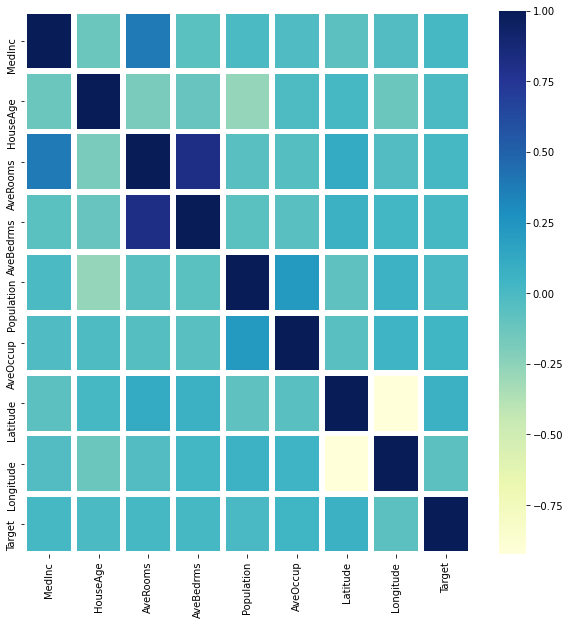

In [43]:
#ヒートマップを作成
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_california.corr(),cmap="YlGnBu",linewidths=5)